In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt 


In [2]:
path = 'CDC-Cases-Forecast'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

    
frame = pd.concat(li, axis=0, ignore_index=True)
frame.target_end_date=pd.to_datetime(frame.target_end_date)

In [3]:
models = frame["Model"].unique()

In [4]:
target = {}
for model in frame["Model"].unique():
    model_frame = frame[(frame["Model"]==model) & (frame["target"] == "1 wk ahead inc case")][["target_end_date", "point"]]
    for i in model_frame.index:
        if model_frame.loc[i].target_end_date in target.keys():
            target[model_frame.loc[i].target_end_date] += 1
        else:
            target[model_frame.loc[i].target_end_date] = 1            
target_df = pd.DataFrame.from_dict(target, orient='index')

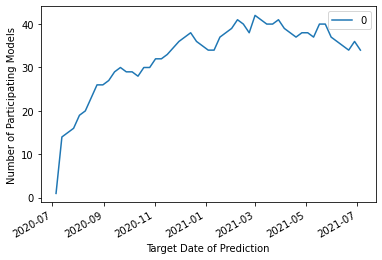

In [5]:
ax = target_df.plot()
ax.set(ylabel="Number of Participating Models", xlabel = "Target Date of Prediction")
plt.savefig('plots/model_pred_timeline.png', bbox_inches='tight', dpi=150)

In [6]:
df_heatmap = frame[frame["target"] == "1 wk ahead inc case"][["Model","target_end_date", "point"]]
df_heatmap['target_end_date'] = df_heatmap['target_end_date'].dt.date
df_heatmap = df_heatmap[df_heatmap["Model"]!="DDS-NBDS"]
pivot = df_heatmap.pivot(index='Model', columns='target_end_date', values='point')

In [7]:
sns.heatmap(pivot, cmap="rocket_r")

NameError: name 'sns' is not defined

In [8]:
df_heatmap = frame[frame["target"] == "1 wk ahead inc case"][["Model","target_end_date", "point"]]
df_heatmap["point"] = 1
df_heatmap['target_end_date'] = df_heatmap['target_end_date'].dt.date
df_heatmap = df_heatmap[df_heatmap["Model"]!="DDS-NBDS"]
pivot = df_heatmap.pivot(index='Model', columns='target_end_date', values='point')

ax = sns.heatmap(pivot, cmap="rocket_r")
ax.set(ylabel="Model Name", xlabel = "Target Date of Prediction")
plt.savefig('plots/model_pred_heatmap.png', bbox_inches='tight', dpi=150)

NameError: name 'sns' is not defined

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

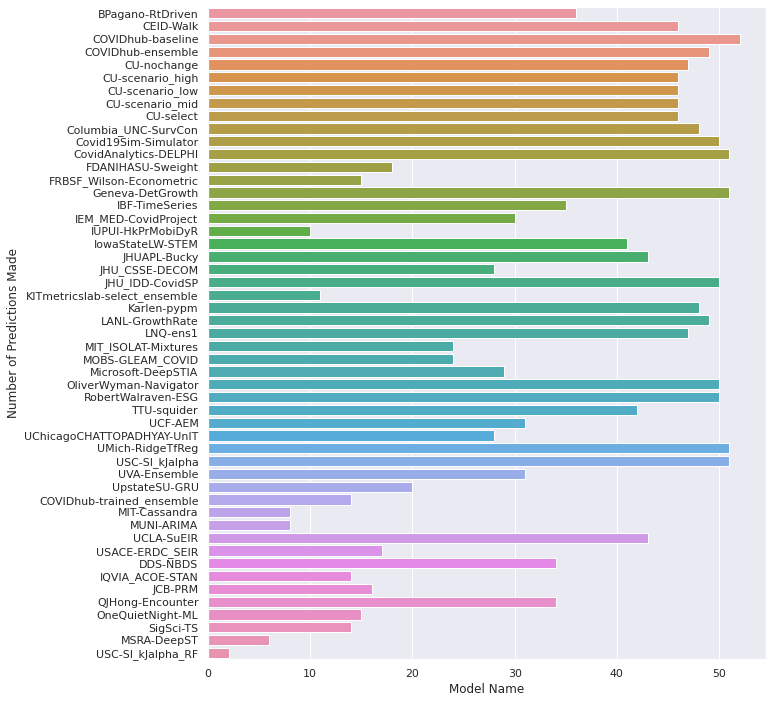

In [10]:
sns.set(rc={'figure.figsize':(10,12)})
ax = sns.countplot(y ='Model', data = frame[frame["target"] == "1 wk ahead inc case"])
ax.set(xlabel="Model Name", ylabel = "Number of Predictions Made")
plt.savefig('plots/model_pred_count.png', bbox_inches='tight', dpi=150)